In [1]:
import imageio
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [2]:
#img = imageio.v3.imread('./leclerc.jpg')

## Carrega a imagem e aplica a cor cinza

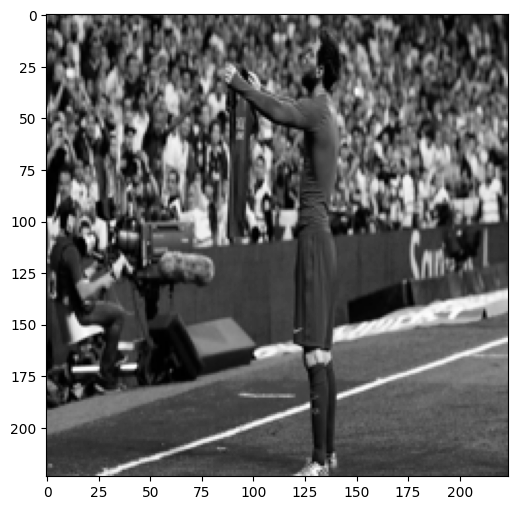

In [5]:
img = Image.open('messi.webp')
img = ImageOps.grayscale(img)
img = img.resize(size=(224, 224))
plot_image(img=img)

## Funções para plotar

In [6]:
# Plota 1 imagem

def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
# Plota as 2 imagens
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');

## Calcula o pixel seguinte após o filtro ser aplicado

In [7]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    for i in range(img_size):
        added = i + kernel_size
  
        if added <= img_size:
            num_pixels += 1
            
    return num_pixels

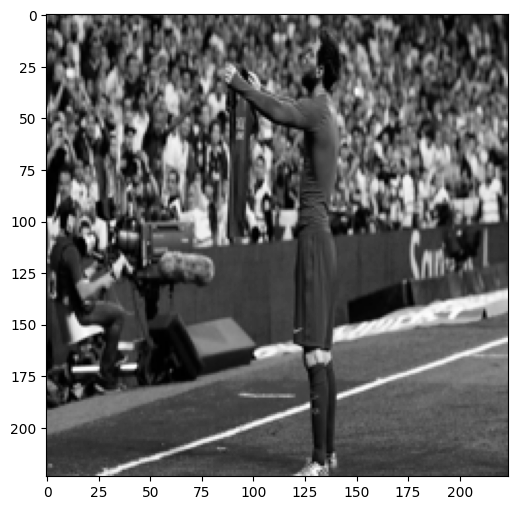

In [8]:
plot_image(img)

## Filtros

In [26]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    #[0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

#blur = np.array([1])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

## Função para aplicar a convolução

In [40]:
def convolve(img: np.array, kernel: np.array) -> np.array:

    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    
    print(tgt_size)

    k = kernel.shape[0]
    l = kernel.shape[1]
    
    active = False
    
    if k == l:
        active = True
    
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    print(k)
    
    for i in range(tgt_size):
    
        for j in range(tgt_size):
            
            mat = img[i:i+k, j:j+l]
            
            if active:
                convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            else:
                if not mat.shape[1] == k:
                    convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
                else:
                    pass
            
               
        
            
            
    return convolved_img

In [41]:
img_sharpened = convolve(img=np.array(img), kernel=blur)
img_sharpened

223
2


array([[46.3125, 49.375 , 50.3125, ..., 31.4375, 16.375 ,  0.    ],
       [43.0625, 41.875 , 44.8125, ..., 29.875 , 15.75  ,  0.    ],
       [34.5625, 33.75  , 39.75  , ..., 26.1875, 12.5   ,  0.    ],
       ...,
       [29.9375, 29.5625, 29.3125, ..., 32.4375, 30.375 ,  0.    ],
       [31.5   , 30.5   , 30.875 , ..., 29.6875, 28.9375,  0.    ],
       [32.5625, 33.0625, 34.0625, ..., 27.25  , 26.125 ,  0.    ]])

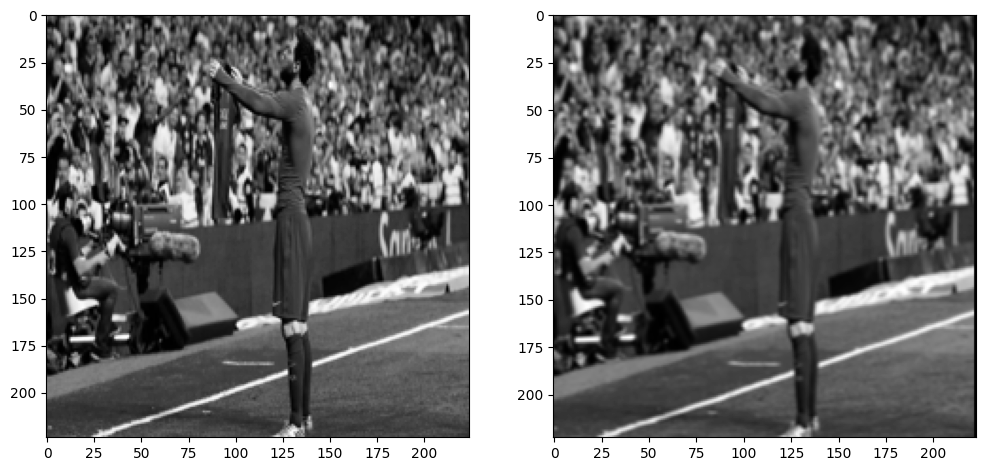

In [42]:
plot_two_images(
    img1=img, 
    img2=img_sharpened
)

## Solving padding problem

In [33]:
def get_padding_width_per_side(kernel_size: int) -> int:

    return kernel_size // 2

In [34]:
def add_padding_to_image(img: np.array, padding_width: int) -> np.array:
    
    img_with_padding = np.zeros(shape=(
        img.shape[0] + padding_width * 2,  
        img.shape[1] + padding_width * 2
    ))
    
    img_with_padding[padding_width:-padding_width, padding_width:-padding_width] = img
    
    return img_with_padding

In [35]:
pad_3x3 = get_padding_width_per_side(kernel_size=5)

(228, 228)


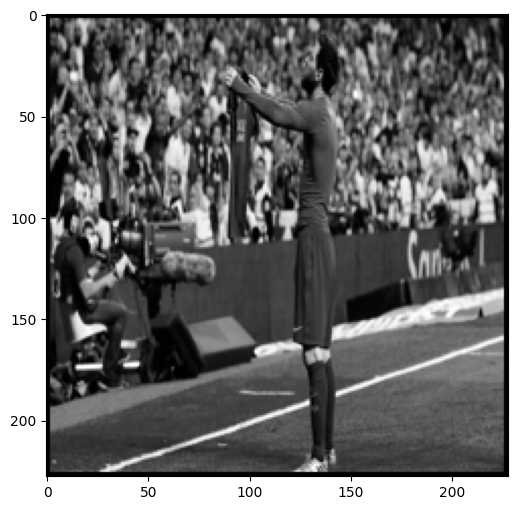

In [36]:
img_with_padding_3x3 = add_padding_to_image(
    img=np.array(img), 
    padding_width=pad_3x3
)

print(img_with_padding_3x3.shape)
plot_image(img_with_padding_3x3)

226
3
(226, 226)


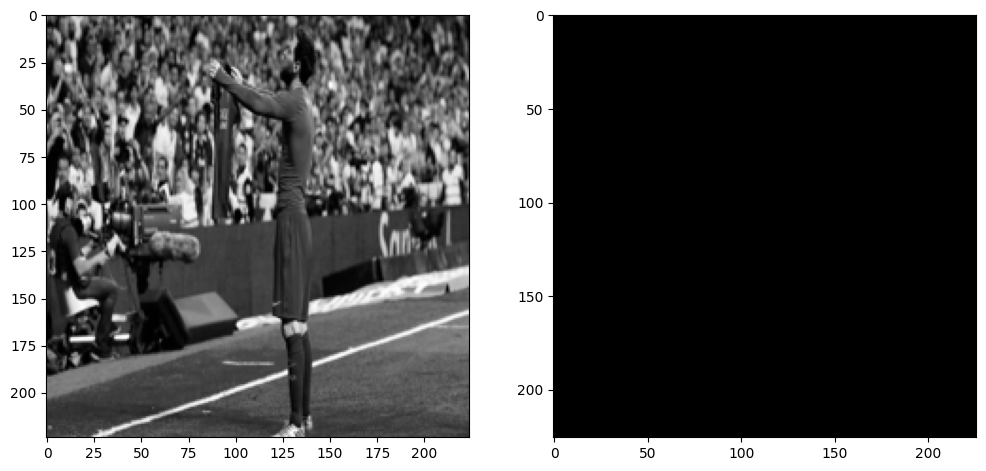

In [37]:
img_padded_3x3_sharpened = convolve(img=img_with_padding_3x3, kernel=sharpen)
print(img_padded_3x3_sharpened.shape)

plot_two_images(
    img1=img, 
    img2=img_padded_3x3_sharpened
)

In [38]:
calculate_target_size(img_size=6, kernel_size=5)

2